# Testing production and degradation on ABC

In [1]:
import pints
import pints.toy as toy
import pints.toy.stochastic
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

(100, 4)


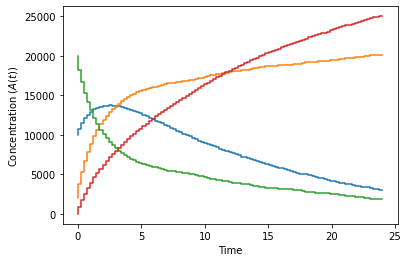

In [2]:
x_0 = [1e4, 2e3, 2e4, 0]
model = pints.toy.stochastic.MichaelisMentenModel(x_0)

times = np.linspace(0, 24, 100)
k = [1e-5, 0.2, 0.2]

np.random.seed(1)
values = model.simulate(k, times)
print(values.shape)
# print("s = (" + str(len(times)) + ", " + str(model.n_outputs()) + ")")
problem = pints.MultiOutputProblem(model, times, values)
error_measure = pints.MeanSquaredError(problem)

log_prior = pints.UniformLogPrior([5e-6, 0.05, 0.1], [2e-5, 0.3, 0.4])

plt.step(times, values)
plt.xlabel('Time')
plt.ylabel(r'Concentration ($A(t)$)')
plt.show()

# Rejection ABC

In [ ]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(7e5)

abc.set_parallel(True)

# set target number of samples
abc.set_n_samples(5)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using Rejection ABC
Running in parallel with 8 worker processess.
Iter. Eval. Acceptance rate Time m:s
1     8      0.125            0:05.1
2     24     0.0833333333     0:10.9
3     72     0.0416666667     0:29.8
cnt_sampled=80
Halting: target number of samples (5) reached.
Done


In [11]:
samples_flat = np.array([item for sublist in samples for item in sublist])

print(len(samples_flat))

800


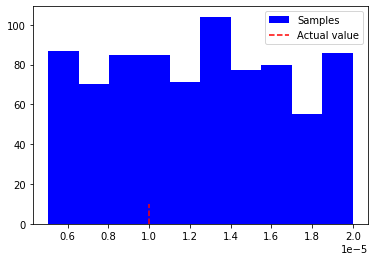

In [12]:
samples_flat = np.array([item for sublist in samples for item in sublist])

plt.hist(samples_flat[:,0], color="blue", label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

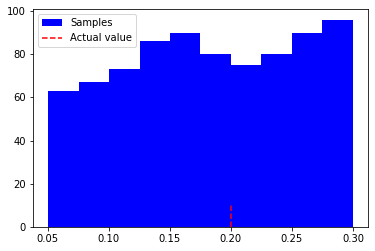

In [13]:
plt.hist(samples_flat[:,1], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

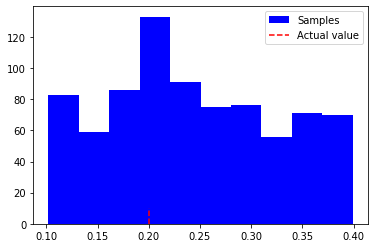

In [14]:
plt.hist(samples_flat[:,2], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# ABC SMC

In [22]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([3e6, 1e6, 7e5]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(100)

abc.sampler().set_perturbation_kernel(
    pints.UniformLogPrior([-1e-6, -0.05, -0.1], [1e-6, 0.05, 0.1])
)

# set target number of samples
abc.set_n_samples(1000)

abc.set_parallel(True)

# log to screen
abc.set_log_to_screen(True)
abc.set_log_interval(1)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in parallel with 8 worker processess.
Starting t=0, with threshold=3000000.0
Iter. Eval. Acceptance rate Time m:s
1     8      0.375            0:05.5
2     16     0.4375           0:09.5
3     24     0.375            0:13.1
4     32     0.375            0:17.1
5     40     0.4              0:20.2
6     48     0.395833333      0:22.9
7     72     0.347222222      0:32.0
8     88     0.306818182      0:38.1
9     96     0.3125           0:41.3
10    104    0.317307692      0:45.4
11    120    0.291666667      0:52.2
12    128    0.296875         0:55.8
13    136    0.294117647      0:58.8
14    152    0.289473684      1:05.4
15    160    0.3              1:08.8
16    168    0.297619047619   1:11.5
17    176    0.306818182      1:14.6
18    184    0.315217391      1:18.2
19    192    0.328125         1:22.8
20    200    0.34             1:26.5
21    208    0.331730769      1:30.8
22    216    0.342592593      1:34.7
23    224    0.334821429      1:38.0
24    232    

In [23]:
samples_flat = np.array([sublist for sublist in samples])

print(len(samples_flat))

1002


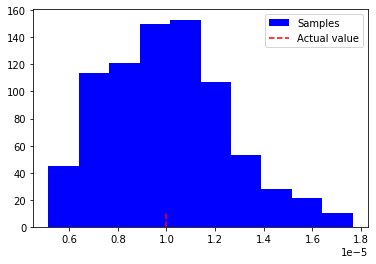

In [24]:
samples_flat = np.array([sublist for sublist in samples])

plt.hist(samples_flat[200:,0], color="blue", label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

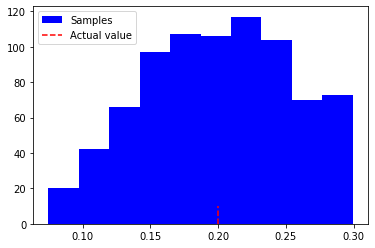

In [25]:
plt.hist(samples_flat[200:,1], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

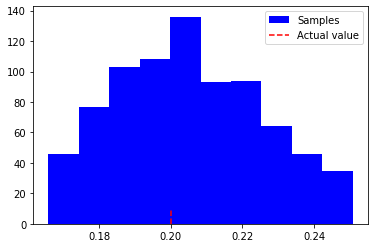

In [26]:
plt.hist(samples_flat[200:,2], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# Save samples

In [15]:
samples_rej = samples

In [16]:
print(samples_rej.tolist())

[[[1.7218607966502307e-05, 0.2151286164330648, 0.3840104649455428], [1.0382104768741729e-05, 0.06936686091210993, 0.18064277948223587], [1.884757545232839e-05, 0.24033054536306547, 0.38003351781710126], [7.4204705585984225e-06, 0.27224523032402037, 0.30309522021510704], [1.449202273972625e-05, 0.24607109176257502, 0.2036255264807837], [1.408641694944841e-05, 0.18819669609720863, 0.3646594072627092], [9.068393587090056e-06, 0.21484401786362894, 0.305292706558359], [1.3812616679627142e-05, 0.16535686650581488, 0.32942875982785264]], [[5.95363131134847e-06, 0.29279984585617597, 0.10976477219298064], [1.9519229545733404e-05, 0.1318247778836028, 0.30834984917793373], [1.6562870620199857e-05, 0.20258185573408216, 0.3798616386922581], [1.2797772575139425e-05, 0.19033811089050934, 0.22284985568384363], [1.969272278951124e-05, 0.061604343310898604, 0.19710440211647162], [1.2555233810180748e-05, 0.19582067654009566, 0.2129872575231531], [5.421821913907721e-06, 0.06261367607578576, 0.345912670836

In [27]:
samples_pmc_mod = samples

In [28]:
print(samples_pmc_mod.tolist())

[[1.1529835889274153e-05, 0.15509195052187225, 0.19910044630116225], [8.069729510567638e-06, 0.2048177415876659, 0.18989640210235698], [9.002409126543e-06, 0.20528345819232374, 0.2587426282831118], [8.304593106058397e-06, 0.13745657125082483, 0.2403362453746901], [8.02614839397448e-06, 0.2101016813037287, 0.24492095066552552], [1.0124204790066646e-05, 0.19178603190692733, 0.22826378898883304], [1.1551208945401988e-05, 0.24413979624927507, 0.26068125204929693], [9.853119763020483e-06, 0.11493618818678426, 0.21606696559622873], [1.7480253494517514e-05, 0.23418676407177824, 0.21376317008249127], [1.245610698101769e-05, 0.1537264593436718, 0.20526157039049217], [1.4657629012222925e-05, 0.21537033167886033, 0.1511431400451312], [1.822478353622823e-05, 0.24450203995211706, 0.1401862624515073], [1.7393747426512373e-05, 0.20589079614053268, 0.15301364847532783], [1.4440395842443734e-05, 0.12379307630493562, 0.15618596341056934], [6.429320783912056e-06, 0.12093895186631366, 0.1644773152392086],